In [1]:
from preprocess import *

from commonfunctions import *
import cv2
import skimage.filters as filters
import scipy.ndimage as nd
from skimage.feature  import *
import os 
from tqdm import tqdm

%matplotlib inline
%load_ext autoreload
%autoreload 2



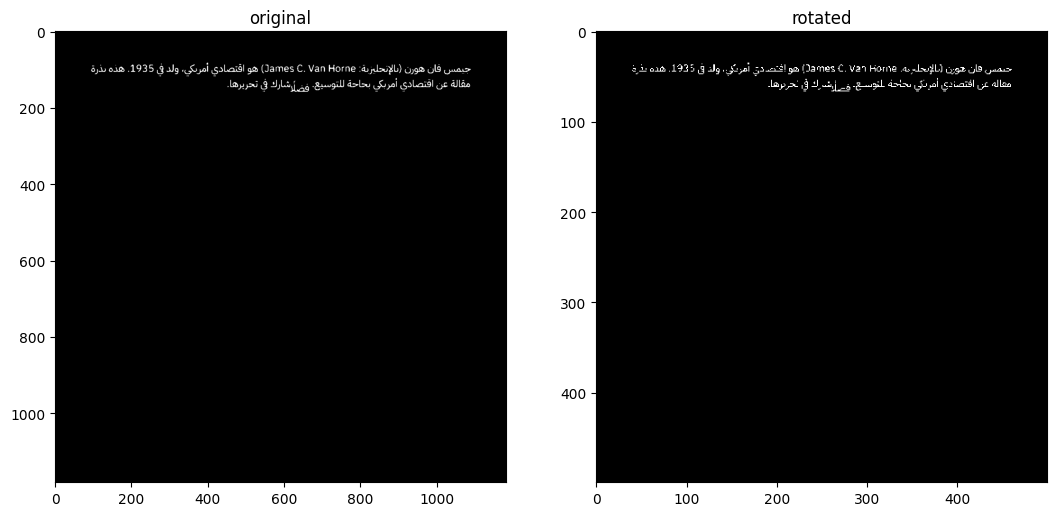

In [40]:
fontName='IBM Plex Sans Arabic'
dir=os.path.join('fonts-dataset',fontName)
outdir=os.path.join('outer',fontName)
img = io.imread(os.path.join(dir,'0.jpeg'))
img=preprocess(img)
rot=removeSkew(img,500)
#get all unique values in the image
# rot= cropImage(rot)
# convert the image to binary to be able to see it 
rot= cv2.threshold(rot, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
cv2.imwrite(os.path.join('outer','0.png'),rot)
#normalize the image
show_images([img,rot],['original','rotated'])
# get the nonzero elements of rot
# print(rot.shape)
# nonzero=np.nonzero(rot)
# print(nonzero)
#save images
# io.imsave(os.path.join('outer','0.jpeg'),rot)
# glcm = graycomatrix(rot,[5],[0])
# get lbp of the image
# radius = 3
# n_points = 8 * radius
# lbp = local_binary_pattern(rot, n_points, radius, 'uniform')
# get hog 
# fd, hog_image = hog(rot, orientations=8, pixels_per_cell=(16, 16),
#                     cells_per_block=(1, 1), visualize=True)



In [41]:
Lemonadafd=[]
IBMPlexfd=[]
Marheyfd=[]
Scheherazadefd=[]
dir=os.path.join('fonts-dataset','IBM Plex Sans Arabic')
lim=len(os.listdir(dir))
outdir='outresize500'
out0=os.path.join(outdir,'IBM Plex Sans Arabic')
out1=os.path.join(outdir,'Marhey')
out2=os.path.join(outdir,'Scheherazade New')
out3=os.path.join(outdir,'Lemonada')
os.makedirs(out0,exist_ok=True)
os.makedirs(out1,exist_ok=True)
os.makedirs(out2,exist_ok=True)
os.makedirs(out3,exist_ok=True)

for i in tqdm(range(0,lim)):
    img = io.imread(os.path.join(dir,str(i)+'.jpeg'))
    img=preprocess(img)
    rot=removeSkew(img,500)
    # rot= cropImage(rot,500)
    # save image
    rot= cv2.threshold(rot, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

    io.imsave(os.path.join(out0,str(i)+'.jpeg'),rot)
    # fd, hog_image = hog(rot, orientations=8, pixels_per_cell=(16, 16),
    #                 cells_per_block=(1, 1), visualize=True)
    # Lemonadafd.append(fd)
    
    img = io.imread(os.path.join('fonts-dataset','Lemonada',str(i)+'.jpeg'))
    img=preprocess(img)
    rot=removeSkew(img,500)
    rot= cv2.threshold(rot, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

    # rot= cropImage(rot,500)
    io.imsave(os.path.join(out3,str(i)+'.jpeg'),rot)

    # fd, hog_image = hog(rot, orientations=8, pixels_per_cell=(16, 16),
    #                 cells_per_block=(1, 1), visualize=True)
    # IBMPlexfd.append(fd)
    
    img = io.imread(os.path.join('fonts-dataset','Marhey',str(i)+'.jpeg'))
    img=preprocess(img)
    rot=removeSkew(img,500)
    rot= cv2.threshold(rot, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
    # rot= cropImage(rot,500)
    io.imsave(os.path.join(out1,str(i)+'.jpeg'),rot)
    # fd, hog_image = hog(rot, orientations=8, pixels_per_cell=(16, 16),
    #                 cells_per_block=(1, 1), visualize=True)
    # Marheyfd.append(fd)
    
    img = io.imread(os.path.join('fonts-dataset','Scheherazade New',str(i)+'.jpeg'))
    img=preprocess(img)
    rot=removeSkew(img,500)
    rot= cv2.threshold(rot, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
    # rot= cropImage(rot,500)
    io.imsave(os.path.join(out2,str(i)+'.jpeg'),rot)
    # fd, hog_image = hog(rot, orientations=8, pixels_per_cell=(16, 16),
    #                 cells_per_block=(1, 1), visualize=True)
    # Scheherazadefd.append(fd)

  0%|          | 0/1000 [00:00<?, ?it/s]C:\Users\DELL\AppData\Local\Temp\ipykernel_16104\3832195574.py:25: UserWarning: outresize500\IBM Plex Sans Arabic\0.jpeg is a low contrast image
  io.imsave(os.path.join(out0,str(i)+'.jpeg'),rot)
C:\Users\DELL\AppData\Local\Temp\ipykernel_16104\3832195574.py:47: UserWarning: outresize500\Marhey\0.jpeg is a low contrast image
  io.imsave(os.path.join(out1,str(i)+'.jpeg'),rot)
  0%|          | 3/1000 [00:12<1:12:45,  4.38s/it]

In [118]:
if os.path.exists('HoGfeatures')==False:
    os.mkdir('HoGfeatures')

import pickle
with open('HoGfeatures/Lemonadafd.pkl', 'wb') as f:
    pickle.dump(Lemonadafd, f)
with open('HoGfeatures/IBMPlexfd.pkl', 'wb') as f:
    pickle.dump(IBMPlexfd, f)
with open('HoGfeatures/Marheyfd.pkl', 'wb') as f:
    pickle.dump(Marheyfd, f)
with open('HoGfeatures/Scheherazadefd.pkl', 'wb') as f:
    pickle.dump(Scheherazadefd, f)


In [121]:
X=np.concatenate([Lemonadafd,IBMPlexfd,Marheyfd,Scheherazadefd])
y=np.concatenate([np.zeros(lim),np.ones(lim),np.ones(lim)*2,np.ones(lim)*3])

In [126]:
# apply SVM 
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'linear'))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)
y_pred = pipe.predict(X_test)
# accuracy score 
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)



0.53875